# Evolution of satellites orbiting the Earth

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

## Database

In this Database created and gathered by the union of scientists we have the specificatio of about 2800 satellites currently orbiting the earth.

After cleanning the data, I would like to take a closer look of the evolution of these satellites per type of satellite and spot, if any, their trend

NOTE: I had issues downoading the dataset directly from the website due to encoding.
I finally could overcome this issue by ading a 'latin' encoding to it.


In [2]:
sat = pd.read_csv('data/UCS-Satellite-Database-8-1-2020.txt', sep='\t', encoding='latin-1')
sat.head()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,1HOPSAT-TD (1st-generation High Optical Perfor...,1HOPSAT,NR (3/20),USA,Hera Systems,Commercial,Earth Observation,Technology Development,LEO,Non-Polar Inclined,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3Cat-1,3Cat-1,NR,Spain,Universitat Politècnica de Catalunya,Civil,Technology Development,NaN,LEO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aalto-1,Aalto-1,Finland,Finland,Aalto University,Civil,Technology Development,NaN,LEO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAUSat-4,AAUSat-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"ABS-2 (Koreasat-8, ST-3)",ABS-2,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Dropping added columns filled with NaN

sat.drop(sat.columns[sat.columns.str.contains('Unnamed:',case = False)],axis = 1, inplace = True)

In [4]:
# I notice that the database has also 3 corrupted lines at the end. I will be dropping these as well:

sat.drop(sat.tail(3).index,inplace=True)

In [5]:
sat.head()
sat.tail(4)

,"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,...,COSPAR Number,NORAD Number,Comments,Source Used for Orbital Data,Source,Source.1,Source.2,Source.3,Source.4,Source.5
2783,Ziyuan 1-2D,Ziyuan 1-2D,NR (11/19),China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,NaN,LEO,Sun-Synchronous,...,2019-059A,44528.0,Hyperspectral imaging,JMSatcat/11_19,https://spaceflightnow.com/2019/09/12/china-la...,http://www.planet4589.org/space/log/satcat.txt,NaN,NaN,NaN,NaN
2784,Ziyuan 3 (ZY-3),Ziyuan 3,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,NaN,LEO,Sun-Synchronous,...,2012-001A,38046.0,Land survey satellite.,www.spacedebris.net 12/12,http://www.spaceflightnow.com/news/n1201/09lon...,https://spacenews.com/china-launches-five-comm...,NaN,NaN,NaN,NaN
2785,Ziyuan 3-2,Ziyuan 3-2,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,NaN,LEO,Sun-Synchronous,...,2016-033A,41556.0,Thought to be for intelligence gathering.,Space50,http://spaceflightnow.com/2016/05/31/long-marc...,https://www.planet4589.org/space/log/satcat.txt,http://space50.org/objekt.php?mot=2016-033A&ja...,NaN,NaN,NaN
2786,Ziyuan 3-3,Ziyuan 3-3,NR (7/20),China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,NaN,LEO,Sun-Synchronous,...,2020-051A,45939.0,Land survey satellite. Provide data for the co...,ZARYA,https://spaceflightnow.com/2020/07/25/china-la...,http://www.lib.cas.cz/space.40/2011/079A.HTM,NaN,NaN,NaN,NaN


In [6]:
#Let's now get acquainted with the dataset:
sat.info()

#From this I see there are some missing data on some of the specs I would like to analyse. 
#Need ot look further into that
#Date type --> needs to be changed
#Sources don't seem to be relevant for the purpose of this analysis

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2787 entries, 0 to 2786
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Name of Satellite, Alternate Names  2787 non-null   object 
 1   Current Official Name of Satellite  2787 non-null   object 
 2   Country/Org of UN Registry          2787 non-null   object 
 3   Country of Operator/Owner           2787 non-null   object 
 4   Operator/Owner                      2787 non-null   object 
 5   Users                               2787 non-null   object 
 6   Purpose                             2787 non-null   object 
 7   Detailed Purpose                    797 non-null    object 
 8   Class of Orbit                      2787 non-null   object 
 9   Type of Orbit                       2162 non-null   object 
 10  Longitude of GEO (degrees)          2787 non-null   float64
 11  Perigee (km)                        2787 no

### Data types

In [7]:
sat.dtypes

Name of Satellite, Alternate Names     object
Current Official Name of Satellite     object
Country/Org of UN Registry             object
Country of Operator/Owner              object
Operator/Owner                         object
Users                                  object
Purpose                                object
Detailed Purpose                       object
Class of Orbit                         object
Type of Orbit                          object
Longitude of GEO (degrees)            float64
Perigee (km)                           object
Apogee (km)                            object
Eccentricity                          float64
Inclination (degrees)                 float64
Period (minutes)                       object
Launch Mass (kg.)                      object
Dry Mass (kg.)                         object
Power (watts)                          object
Date of Launch                         object
Expected Lifetime (yrs.)              float64
Contractor                        

In [8]:
sat['Date of Launch'] = pd.to_datetime(sat['Date of Launch'])
sat.dtypes
# sat['Date of Launch'].unique()
#cool

Name of Satellite, Alternate Names            object
Current Official Name of Satellite            object
Country/Org of UN Registry                    object
Country of Operator/Owner                     object
Operator/Owner                                object
Users                                         object
Purpose                                       object
Detailed Purpose                              object
Class of Orbit                                object
Type of Orbit                                 object
Longitude of GEO (degrees)                   float64
Perigee (km)                                  object
Apogee (km)                                   object
Eccentricity                                 float64
Inclination (degrees)                        float64
Period (minutes)                              object
Launch Mass (kg.)                             object
Dry Mass (kg.)                                object
Power (watts)                                 

## Filtering-out Unnecessary columns

In [9]:
sat.drop(['Name of Satellite, Alternate Names','Country/Org of UN Registry','Operator/Owner','Purpose','Detailed Purpose','Type of Orbit','Eccentricity','Inclination (degrees)','Period (minutes)','Contractor','Launch Site','COSPAR Number','NORAD Number','Comments'], axis = 1,inplace=True)

In [10]:
sat.drop(sat.columns[sat.columns.str.contains('Source',case = False)],axis = 1, inplace = True)

In [11]:
sat.head(2)

,Current Official Name of Satellite,Country of Operator/Owner,Users,Class of Orbit,Longitude of GEO (degrees),Perigee (km),Apogee (km),Launch Mass (kg.),Dry Mass (kg.),Power (watts),Date of Launch,Expected Lifetime (yrs.),Country of Contractor,Launch Vehicle
0,1HOPSAT,USA,Commercial,LEO,0.0,566,576,22,NaN,NaN,2019-12-11,0.5,USA,PSLV
1,3Cat-1,Spain,Civil,LEO,0.0,476,500,4,NaN,NaN,2018-11-29,NaN,Spain,PSLV


In [12]:
## Relevant columns so far:

# Countries/owners : currently exploiting the sats
#Country of contractor : who builds sats
# Users = gral purpose (Commercial,Government,Military,Civil and any mix between these) PB! --> Get dummies?!
# Class of orbit = Type of satellite --> will certainly have a direct relation with measurements -specs
# Date of Launch

## Renaming columns (to filter-out spaces)

In [13]:
sat.rename(columns={'Current Official Name of Satellite':'CurrentOfficial_Name',
                    'Country of Operator/Owner':'OperatorOwner_Country',
                    'Class of Orbit':'Orbit_Class','Longitude of GEO (degrees)':'GEOlongitude',
                    'Perigee (km)':'Perigee_km','Apogee (km)':'Apogee_km','Launch Mass (kg.)':'LaunchMass_kg',
                    'Dry Mass (kg.)':'DryMass_kg','Power (watts)':'Power_watts','Date of Launch':'Launch_Date',
                    'Expected Lifetime (yrs.)':'ExpectedLifetime','Country of Contractor':'Contractor_Country',
                    'Launch Vehicle':'Launch_Vehicle'}, inplace=True)

## Missing Values

In [14]:
missing_values = sat.isnull().sum().sort_values(ascending=False)
missing_values[:7] #the columns with missing values

#To look into following relevant columns with high missing values:

#Dry Mass(vs. LaunchMass)
#Launch Mass (less missing values)
#Power 
#Expected lifetime, 
#Type of Orbit (vs.Class of Orbit)--> Solved! Class of Orbit is what I need and no missing values!


DryMass_kg            2344
Power_watts           2184
ExpectedLifetime      1639
LaunchMass_kg          207
Launch_Vehicle           0
Contractor_Country       0
Launch_Date              0
dtype: int64

## Checking relevant columns

- Classification/reclassification of interesting data
- Identification of interesting data points to be explore

### Identifyng types of satellites

In [15]:
#Type of Orbits
# print(sat['Type of Orbit'].value_counts())
# sat['Type of Orbit'].hist(figsize=(15,12))
#3 major types (counting polar) I believe class of orbit represents better 

LEO           2032
GEO            560
MEO            137
Elliptical      58
Name: Orbit_Class, dtype: int64


<AxesSubplot:>

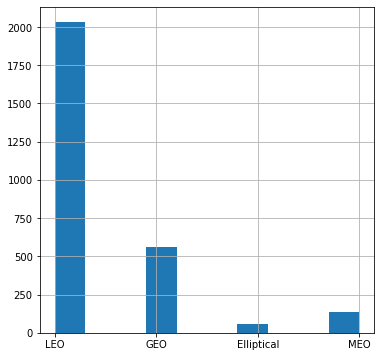

In [16]:
#Orbit_Class
print(sat['Orbit_Class'].value_counts())
sat['Orbit_Class'].hist(figsize=(6,6))

#LEO: Low Eliptic Orbit --> 
#GEO : -->
#MEO: -->
#elliptical: specific type of satellites using a specific type of orbit. 

# I see one category that stands out, but by looking into it, I aslso see that some of the 
#new type Telecom satellite constellations have been include
# In order to better identify them, I will add another category: CONS (constellations)

In [36]:
satellites = ['Starlink','Globalstar','OneWeb','Iridium']

sat['Class'] =[]
for n in sat.CurrentOfficial_Name:
    for s in satellites:
        if s in str(n):
            sat['Class'].append(s)
            


ValueError: Length of values (0) does not match length of index (2787)

In [39]:
satellites = ['Starlink','Globalstar','OneWeb','Iridium']

def not_in_types(row):
    for s in satellites:
        if s in str(row):
            return 'CONS'
    
#applying it to the df:
sat['Class1'] = sat['CurrentOfficial_Name'].apply(lambda row: not_in_types(row))

sat['Class1'].value_counts()

for c in sat.Class1:
    for n in sat.CurrentOfficial_Name
        if c == None:

CONS    704
Name: Class1, dtype: int64

### Country (operator/owner vs. contractor)

- **Operator/owner:** not always the same. these are the ones (as the name indicates) operationg the satellite
- **Constructor**

I chose to keep both categories because it is interesting to see who runs them and who construct them (less constructors)

#### OPERATOR/OWNER

#### Top 10

In [ ]:
print(sat['Country of Operator/Owner'].value_counts()[:10])
sats_country = sat.groupby(['Country of Operator/Owner'])['Current Official Name of Satellite'].agg('count').sort_values(ascending=False)[:10]
sats_country.plot.bar(figsize=(15,8), color = 'olive')

#Note:
#The home country identified with the operator/owner given in column D, i.e., the country that operates 
#or owns the satellite or the home country of the business entity that does so. If this includes three 
#or fewer countries, each is listed; otherwise the project is simply designated as Multinational. 
#An exception to this is projects of the European Space Agency (ESA), which represent the joint efforts 
#of its 15 member states and are designated as ESA.

#LET OP: some countries like Frane have multiple partnership projects as well as 'own' therefore,
#whist the total of project under 1flag are lower, the total amount might be higher but is currently split 

#### Top 30

<AxesSubplot:xlabel='OperatorOwner_Country'>

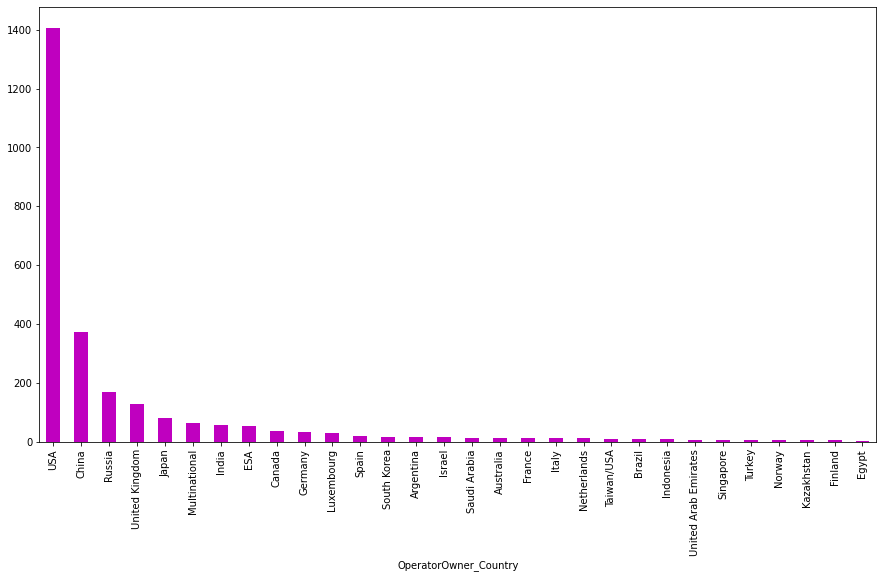

In [40]:
sats_country= sat.groupby(['OperatorOwner_Country'])['CurrentOfficial_Name'].count().sort_values(ascending=False)[:30]
sats_country.plot.bar(figsize=(15,8), color = 'm')

#### ...per ORBIT CLASS

OperatorOwner_Country
USA                     1406
China                    375
Russia                   170
United Kingdom           129
Japan                     80
Multinational             64
India                     58
ESA                       53
Canada                    39
Germany                   33
Luxembourg                32
Spain                     21
South Korea               17
Argentina                 16
Israel                    16
Saudi Arabia              13
Australia                 13
France                    12
Italy                     12
Netherlands               12
Taiwan/USA                11
Brazil                    11
Indonesia                  9
United Arab Emirates       8
Singapore                  8
Turkey                     7
Norway                     7
Kazakhstan                 7
Finland                    6
Egypt                      5
Name: CurrentOfficial_Name, dtype: int64


<AxesSubplot:xlabel='Orbit_Class,OperatorOwner_Country'>

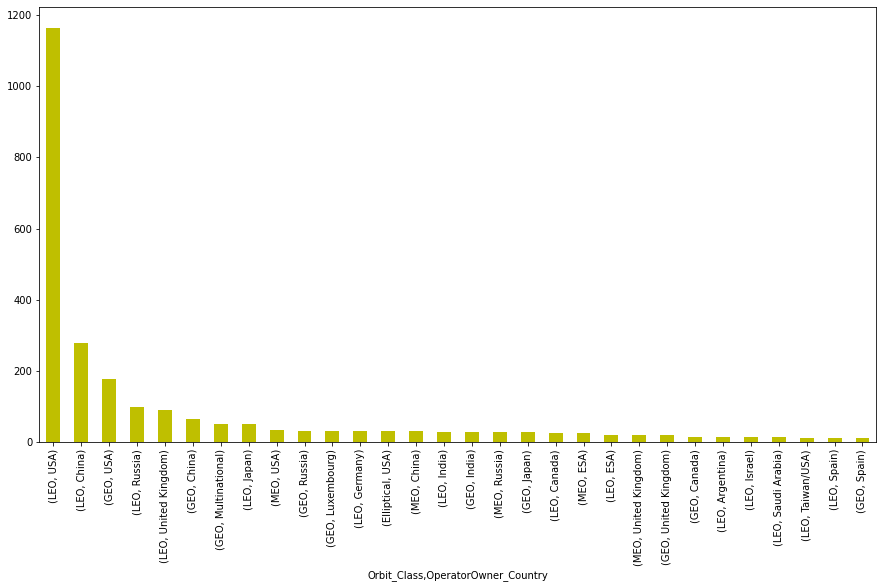

In [41]:
print(sats_country)
sats_country_class = sat.groupby(['Orbit_Class','OperatorOwner_Country'])['CurrentOfficial_Name'].agg('count').sort_values(ascending=False)[:30]
sats_country_class.plot.bar(figsize=(15,8), color = 'y')

#### CONSTRUCTORS

### Satellites per Users

In this case users refers to the use of the satellite (purpose)
The affiliation of the primary users of the satellite is described with one or more of the keywords (4 main categories) Satellites can be multi-use, hosting, for example, dedicated transponders for both 
commercial and military applications.

- Civil: academic, amateur
- Governmental : meteorological, scientific, etc.
- Commercial : Telecoms
- Military


In [43]:
print(sat.Users.value_counts())
#From this I see too many categories... looking for a way to better categorize this. Dummies?

Commercial                        1514
Government                         452
Military                           357
Civil                              140
Government/Commercial              114
Military/Commercial                 77
Military/Government                 57
Government/Civil                    43
Commercial/Civil                    11
Military/Civil                       7
Government/Military                  5
Civil/Government                     2
Civil/Military                       2
Commercial/Military                  2
Commercial/Government                1
Military                             1
Commercial                           1
Government/Commercial/Military       1
Name: Users, dtype: int64


In [44]:
# 4 main caegories and the rest are mixes from these. I will grup the mix in a separate category Dual,
#but first I need to alig them (correct manual data entries)

covert_dict={'Commercial/Government':'Government/Commercial','Commercial/Military':'Military/Commercial',
             'Civil/Military':'Military/Civil','Government/Military':'Military/Government','Civil/Government':'Government/Civil',
            'Commercial ':'Commercial','Military ':'Military'}
sat.Users = sat.Users.replace(covert_dict)

In [45]:
sat.Users.value_counts()

Commercial                        1515
Government                         452
Military                           358
Civil                              140
Government/Commercial              115
Military/Commercial                 79
Military/Government                 62
Government/Civil                    45
Commercial/Civil                    11
Military/Civil                       9
Government/Commercial/Military       1
Name: Users, dtype: int64

In [46]:
sat['Users_group'] = sat.Users

In [47]:
#This is just forcing the data to submission... oh well, couldn't seem to find a list comprehension way here...

group = {'Government/Commercial':'Dual','Military/Commercial':'Dual','Military/Government':'Dual',
         'Government/Civil':'Dual','Commercial/Civil':'Dual','Military/Civil':'Dual','Government/Commercial/Military':'Dual'}

sat.Users_group = sat.Users_group.replace(group)


In [48]:
sat.Users_group.unique()

array(['Commercial', 'Civil', 'Military', 'Government', 'Dual'],
      dtype=object)

#### country/operator per user group

In [49]:
sats_users = sat.groupby(['OperatorOwner_Country','Users_group'])['CurrentOfficial_Name'].agg('count').sort_values(ascending=False)[:30]
sats_users

OperatorOwner_Country  Users_group
USA                    Commercial     998
                       Military       169
                       Dual           142
China                  Government     139
United Kingdom         Commercial     120
China                  Commercial      93
Russia                 Military        72
USA                    Government      66
China                  Military        63
                       Dual            57
Russia                 Dual            55
India                  Government      45
Multinational          Commercial      42
Japan                  Government      33
USA                    Civil           31
Luxembourg             Commercial      31
ESA                    Commercial      27
                       Government      25
Canada                 Commercial      25
Japan                  Commercial      24
China                  Civil           23
Russia                 Commercial      19
Japan                  Civil           18

### Vehicle type 

With this I want to show the rise of independant actors such as SpaceX and the decline of institutions such as Ariane Space

In [51]:
sat['Launch_Vehicle'].unique() 
#OMG ok, too many... This remind me of a lab challenge with Servers... Maybe I can categorize these somehow

array(['PSLV', 'Soyuz 2.1a', 'Ariane 5 ECA', 'Falcon 9', 'Atlas 3',
       'Proton', 'Ariane', 'Titan IVA', 'Titan IV', 'Delta 4 Heavy',
       'Atlas 5', 'Vega', 'Nanorack Deployer', 'Electron', 'Dnepr',
       'Antares 230', 'Ariane 5', 'Pegasus XL', 'PSLV-CA', 'Soyuz-2.1b',
       'Soyuz 2,1v', 'Long March 3B', 'Atlas 2A', 'Atlas 2AS', 'Proton M',
       'Ariane 44L', 'Ariane 44LP', 'Proton K', 'Ariane 5G', 'Soyuz 2.1b',
       'Zenit 3SLB', 'Zenit 2SB', 'Delta 2310', 'Soyuz', 'Epsilon',
       'Falcon Heavy', 'Proton D', 'Breeze M', 'Ariane 42P', 'PSLV C-30',
       'PSLV-C29', 'Long March 4B', 'Long March 3C', 'Long March 3A',
       'Kosmos 3M', 'J-SSOD Deployer', 'PSLV C3', 'PSLV XL',
       'Soyuz-Fregat', 'Long March 2B', 'Delta 2', 'Long March 11',
       'PSLV C9', 'PSLV C6', 'PSLV C7', 'Atlas  5', 'Kuaizhou',
       'Long March 2C', 'Space Shuttle (STS 93)', 'Long March 2D', 'H2A',
       'SEOPS Slingshot Deployer', 'Strela', 'Titan 2', 'Soyuz 2',
       'Minotaur-1', 'Roko

In [52]:
sat['Launch_Vehicle'].value_counts()

Falcon 9                      711
PSLV                          198
Atlas 5                       102
Soyuz 2.1a                    102
Ariane 5                       87
                             ... 
Delta 7420                      1
PSLV C12                        1
Delta 7320                      1
Space Shuttle (STS 31)          1
Japanese Experiment Module      1
Name: Launch_Vehicle, Length: 153, dtype: int64

In [53]:
vehicle_manuf = ['SpaceX', 'ArianeSpace', 'JAXA','Soyuz',]
type_vehicle = []

vehicles =['Falcon','PSLV','Soyuz','Atlas','Titan','Ariane','Delta','Vega','Nanorack','Electron','Dnepr','Antares',
          'Pegasus','Long March','Proton','Epsilon','Zenit','Delta','Breeze','J-SSOD','Kosmos','Kuaizhou','Space Shuttle',
           'H2A','Strela','SEOPS','Minotaur','Rokot','Start','GSLV','JAXA','L1011','Taurus','Qased','Shavit','Athena',
           'Jielong','Kaber','Dextre','Manual','Japanese','Naro','KT','Tsyklon']

def not_in_types(row):
    for v in vehicles:
        if v in str(row):
            return v
    
#applying it to the df:
sat['Vehicle_group'] = sat['Launch_Vehicle'].apply(lambda row: not_in_types(row))

In [ ]:
sat['Vehicle_group'].unique()

In [54]:
#After a deeper inspection of these vehicles, I see that there are some in this list that belong to another type:
#(not really a vehicle) but a In-Space deployer type. I will therefore re-classify these under In-space

group_v = {
       'Nanorack':'In-Space deployer', 
       'J-SSOD':'In-Space deployer','SEOPS':'In-Space deployer',
       'L1011':'Pegasus',
       'Kaber':'In-Space deployer',
       'Manual':'In-Space deployer', 'Japanese':'In-Space deployer'}
sat.Vehicle_group = sat.Vehicle_group.replace(group_v)

In [55]:
missing_vehicle = sat.Vehicle_group.isnull().sum()
missing_vehicle

1

In [56]:
sat['Vehicle_group'].value_counts()

Falcon               733
Long March           382
Soyuz                333
PSLV                 264
Ariane               199
Atlas                134
Proton               124
Delta                 97
In-Space deployer     75
Dnepr                 69
Rokot                 52
Electron              45
Pegasus               41
H2A                   41
Zenit                 36
Minotaur              26
Titan                 23
Kosmos                18
Kuaizhou              18
Vega                  17
Breeze                 9
Epsilon                8
GSLV                   8
Space Shuttle          6
Shavit                 6
Antares                6
Jielong                3
Tsyklon                2
Strela                 2
Taurus                 2
Start                  2
Qased                  1
Naro                   1
JAXA                   1
KT                     1
Athena                 1
Name: Vehicle_group, dtype: int64

In [110]:
share_Launcher = sat.groupby(['Vehicle_group'])['Launch_Date'].nunique().sort_values(ascending=False).reset_index()
share_Launcher['share'] = round((share_Launcher['Launch_Date']/(sat.groupby(['Vehicle_group'])['Launch_Date'].nunique().sum())*100),1)
# sat.groupby(['Vehicle_group'])['Launch_Date'].nunique().sum()

share_Launcher['cum_sum'] = share_Launcher.cumsum()['share']
share_Launcher[:15].sort_values(by='Vehicle_group') 

,Vehicle_group,Launch_Date,share,cum_sum
1,Ariane,118,10.8,30.8
3,Atlas,95,8.7,49.6
5,Delta,81,7.4,64.9
13,Dnepr,18,1.6,89.0
6,Falcon,63,5.8,70.7
10,H2A,27,2.5,83.3
9,In-Space deployer,30,2.7,80.8
0,Long March,218,20.0,20.0
7,PSLV,45,4.1,74.8
14,Pegasus,16,1.5,90.5


<AxesSubplot:xlabel='Launch_Date'>

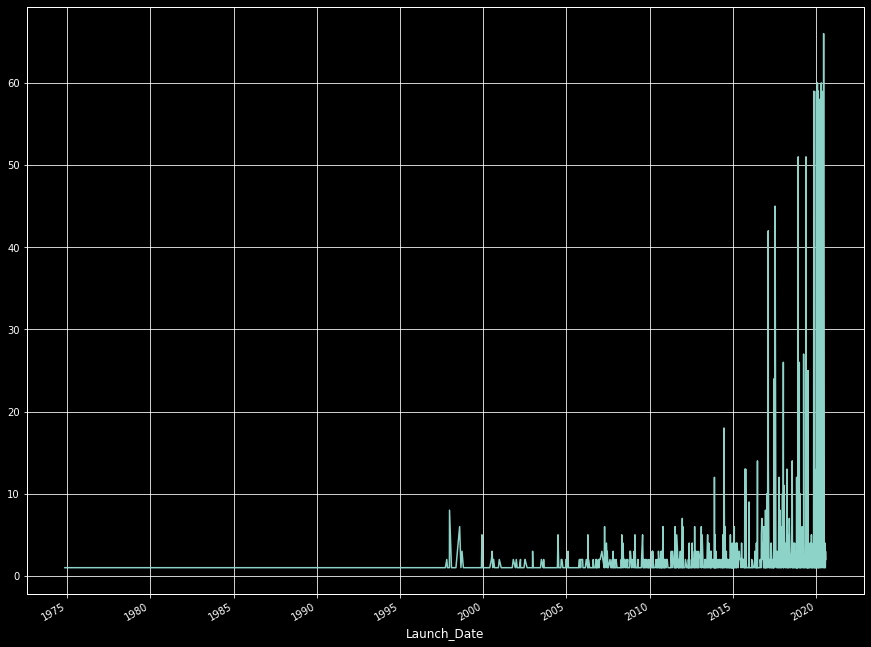

In [80]:
sats_launch = sat.groupby(['Launch_Date'])['CurrentOfficial_Name'].count()
plt.style.use("dark_background")
# plt.style.use("ggplot")

fig = plt.figure(figsize=(15,15))

x,y = [], []
index= sats_launch
def animate(i):
    x.append(next(index))
    y.append()
    plt.style.use("ggplot")    
    plt.plot(x,y)

ani = FuncAnimation(fig, animate, interval=300)
plt.show()

In [20]:
sat.columns

Index(['CurrentOfficial_Name', 'OperatorOwner_Country', 'Users', 'Orbit_Class',
       'GEOlongitude', 'Perigee_km', 'Apogee_km', 'LaunchMass_kg',
       'DryMass_kg', 'Power_watts', 'Launch_Date', 'ExpectedLifetime',
       'Contractor_Country', 'Launch_Vehicle'],
      dtype='object')

<AxesSubplot:xlabel='Launch_Date'>

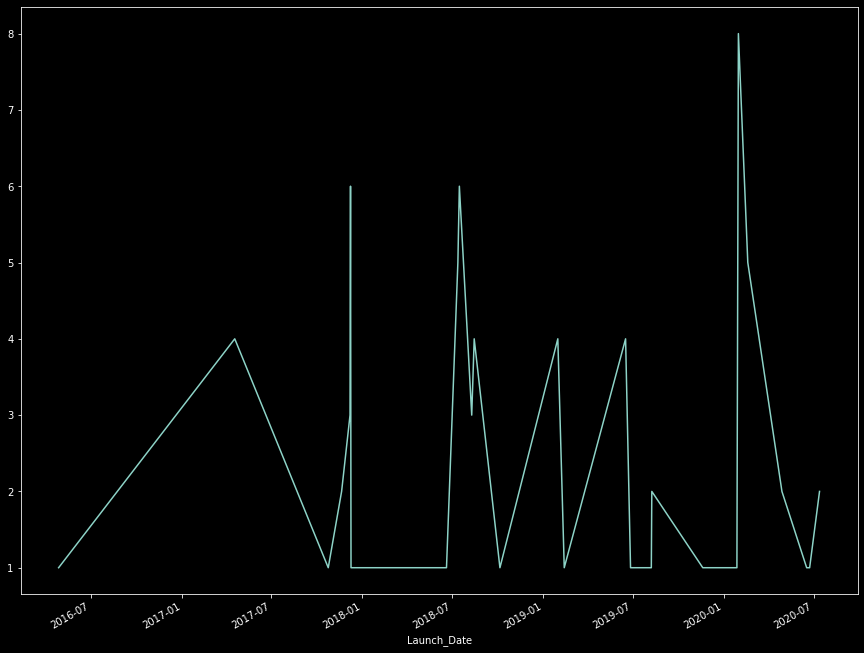

In [75]:
plt.style.use("dark_background")
sats_launch = sat.loc[sat['Vehicle_group']=='In-Space deployer'].groupby(['Launch_Date'])['CurrentOfficial_Name'].count()
sats_launch.plot(figsize=(15,12)) #This would be nice to do it per year with plotly !Sum per year?

<AxesSubplot:xlabel='Launch_Date'>

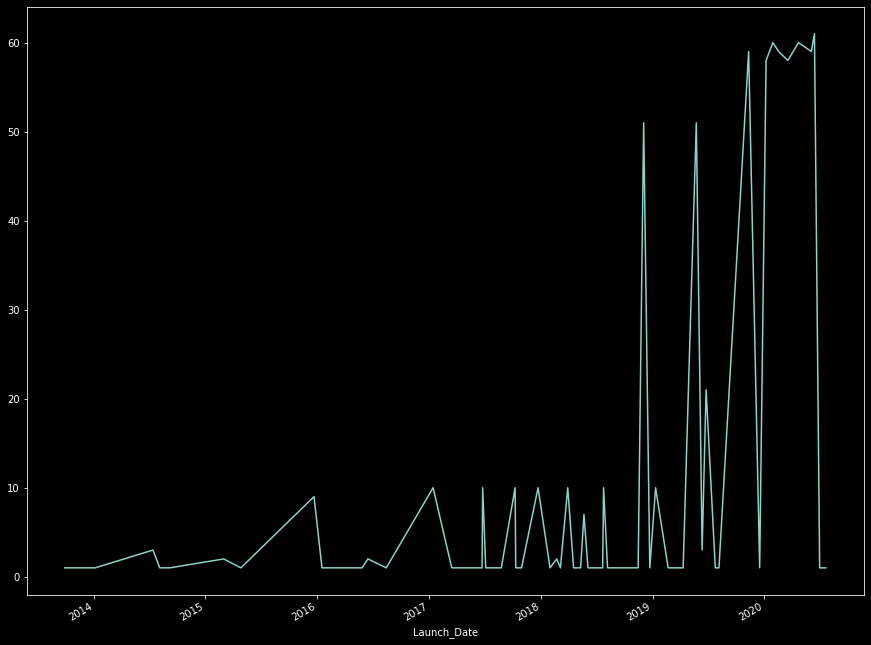

In [74]:
plt.style.use("dark_background")
sats_launch = sat.loc[sat['Vehicle_group']=='Falcon'].groupby(['Launch_Date'])['CurrentOfficial_Name'].count()
sats_launch.plot(figsize=(15,12)) #This would be nice to do it per year with plotly !Sum per year?

<AxesSubplot:xlabel='Launch_Date'>

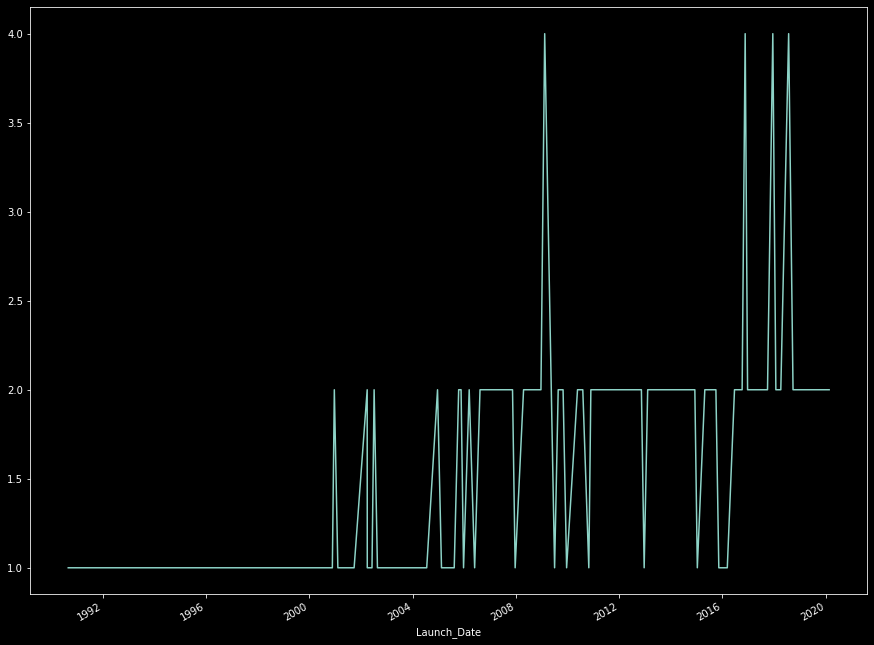

In [73]:
plt.style.use("dark_background")
sats_launch = sat.loc[sat['Vehicle_group']=='Ariane'].groupby(['Launch_Date'])['CurrentOfficial_Name'].count()
sats_launch.plot(figsize=(15,12)) #This would be nice to do it per year with plotly !Sum per year?

In [62]:
search = sat.loc[sat['Vehicle_group']=='Ariane'].sort_values(by='Launch_Date')
search

,CurrentOfficial_Name,OperatorOwner_Country,Users,Orbit_Class,GEOlongitude,Perigee_km,Apogee_km,LaunchMass_kg,DryMass_kg,Power_watts,Launch_Date,ExpectedLifetime,Contractor_Country,Launch_Vehicle,Class1,Users_group,Vehicle_group
1849,Skynet 4C,United Kingdom,Military,GEO,-1.30,"35,775","35,797","1,474",850,"1,200",1990-08-30,7.0,France/UK/Germany,Ariane 44LP,None,Military,Ariane
119,Astra 1D,Luxembourg,Commercial,GEO,67.70,"35,776","35,795","2,924","1,700","3,300",1994-11-01,15.0,USA,Ariane 42P,None,Commercial,Ariane
1333,MSAT 1,USA/Canada,Commercial,GEO,-106.43,"35,763","35,809","2,850","1,330","3,300",1996-04-20,12.0,Canada,Ariane 42P,None,Commercial,Ariane
70,AMC-2,USA,Commercial,GEO,-100.98,"35,774","35,798","2,648","1,600","6,500 (EOL)",1997-01-30,15.0,USA,Ariane 44L,None,Commercial,Ariane
1425,NSS-5,Netherlands,Commercial,GEO,50.50,"35,776","35,796","3,412","2,000",NaN,1997-09-23,14.0,USA,Ariane 42L,None,Commercial,Ariane
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2573,TIBA-1,Egypt,Military/Commercial,GEO,35.50,"35,732","35,790","5,600",NaN,NaN,2019-11-26,15.0,France/Italy,Ariane 5 ECA,None,Dual,Ariane
617,Eutelsat Konnect,Multinational,Commercial,GEO,14.00,"35,700","35,700","3,618",NaN,NaN,2020-01-16,15.0,France/UK/Germany/Spain,Ariane 5,None,Commercial,Ariane
844,GSAT-30,India,Government,GEO,83.00,"35,794","35,844","3,357",NaN,NaN,2020-01-16,15.0,India,Ariane 5,None,Government,Ariane
737,GEO-Kompsat-2B,South Korea,Government,GEO,128.00,"35,782","35,792","3,379",NaN,NaN,2020-02-18,10.0,South Korea,Ariane 5,None,Government,Ariane


<AxesSubplot:xlabel='Year'>

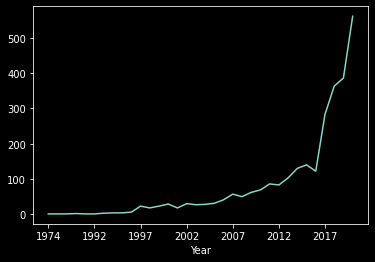

In [71]:
#nb of sats per year
launch = list(sat['Launch_Date'].unique())
plt.style.use("dark_background")
sat['Year'] = sat['Launch_Date'].astype(str).str[:4]
sat_year = sat.groupby(['Year'])['CurrentOfficial_Name'].count()
sat_year.plot()

Year
1974      1
1988      1
1989      1
1990      2
1991      1
1992      1
1993      3
1994      4
1995      4
1996      6
1997     23
1998     18
1999     23
2000     29
2001     18
2002     30
2003     27
2004     28
2005     31
2006     41
2007     57
2008     50
2009     62
2010     69
2011     86
2012     83
2013    103
2014    130
2015    140
2016    122
2017    283
2018    363
2019    386
2020    561
Name: Launch_Date, dtype: int64

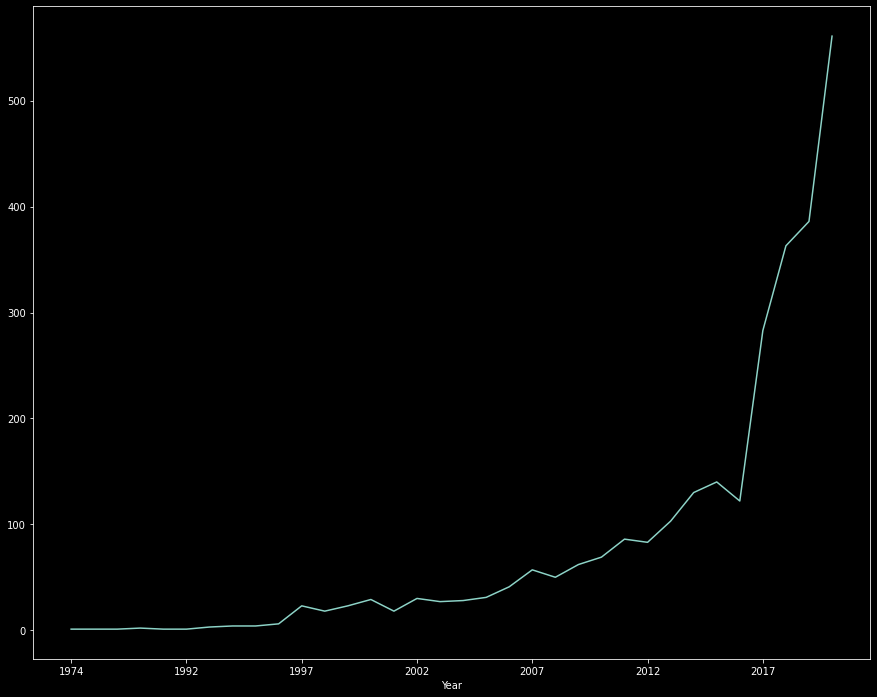

In [72]:
sats_launch = sat.groupby(['Year'])['Launch_Date'].count()
plt.style.use("dark_background")
sats_launch.plot(figsize=(15,12))
sats_launch

In [68]:
sat['Year'] = sat['Year'].astype(int)
years = sat['Year'].unique()
np.sort(years)
sat.dtypes

CurrentOfficial_Name             object
OperatorOwner_Country            object
Users                            object
Orbit_Class                      object
GEOlongitude                    float64
Perigee_km                       object
Apogee_km                        object
LaunchMass_kg                    object
DryMass_kg                       object
Power_watts                      object
Launch_Date              datetime64[ns]
ExpectedLifetime                float64
Contractor_Country               object
Launch_Vehicle                   object
Class1                           object
Users_group                      object
Vehicle_group                    object
Year                              int64
dtype: object

In [69]:
launch_year = sat.groupby(['Year'])['Launch_Date'].count()

In [70]:
sat.to_csv('sat_clean.csv',index=False)

In [ ]:
#NOTE TO SELF:
#Perhaps adding continent, country code?
# import CountryCode
# CountryCode=pd.read_csv('https://pkgstore.datahub.io/JohnSnowLabs/country-and-continent-codes-list/country-and-continent-codes-list-csv_csv/data/b7876b7f496677669644f3d1069d3121/country-and-continent-codes-list-csv_csv.csv',sep=',')
# #checking
# CountryCode
# #Taking only code and continent name
# CountryCode=CountryCode[['Continent_Name','Three_Letter_Country_Code']]
# #Merging and removing last column
# df_final=pd.merge(df,CountryCode,left_on='Code',right_on='Three_Letter_Country_Code',how='left')
# df_final = df_final.iloc[:, :-1] #remove last column
# df_final